# <center> FSAN/ELEG815 Analytics I: Statistical Learning <center>
# <center> Homework #2, Fall 2024 <center>
## <center> written by Chenchuan He <center>

## Question 1. 

Write a function to perform KNN (K nearest neighbors) classification in
2D based on the Euclidean distance metric. The function should receive
as parameters the data Matrix, containing the points and the class of each
point, the query matrix, containing the coordinates of the points you wish
to classify, and the number of neighbors. The output should be the classes
for each of the query points. Test your code for the attached data given
in “H3Data.mat” with $k = 3$

In [5]:
# read data "hw2/Data/H3Data.mat"
# !pip install scipy
import numpy as np
import scipy.io
data = scipy.io.loadmat('/Users/chuan/Desktop/c815_course_hws/hw2/Data/H3Data.mat')

In [9]:
data['Datamat'].shape, data['Querymat'].shape

((100, 3), (20, 2))

In [18]:
query_coordinates = data['Querymat']
data_coordinates = data['Datamat'][:,:2]
data_labels = data['Datamat'][:,2]
k=3
for query_data_point in query_coordinates:
    # calculate the distance between the query data point and all the data_coordinates
    distances = np.linalg.norm(data_coordinates - query_data_point, axis=1)
    # sort indices of distances and get the k nearest labels
    sorted_indices = np.argsort(distances)
    k_nearest_labels = data_labels[sorted_indices[:k]]
    # get the most frequent label
    most_frequent_label = np.argmax(np.bincount(k_nearest_labels))
    # add to the predicted_query_labels
    # predicted_query_labels.append(most_frequent_label)

TypeError: Cannot cast array data from dtype('<f8') to dtype('int64') according to the rule 'safe'

In [25]:
def KNN(Datamat, Querymat, k, distance_type = 'euclidean'):
    # Datamat: n*d, Querymat: m*d
    data_coordinates = Datamat[:,:2]
    data_labels = Datamat[:,2]
    # ensure the labels are integers
    data_labels = data_labels.astype(int)

    query_coordinates = Querymat[:,:2]

    predicted_query_labels = []

    for query_data_point in query_coordinates:
        # calculate the distance between the query data point and all the data_coordinates
        distances = np.linalg.norm(data_coordinates - query_data_point, axis=1)
        # sort indices of distances and get the k nearest labels
        sorted_indices = np.argsort(distances)
        k_nearest_labels = data_labels[sorted_indices[:k]]
        # get the most frequent label
        most_frequent_label = np.argmax(np.bincount(k_nearest_labels))
        # add to the predicted_query_labels
        predicted_query_labels.append(most_frequent_label)

    return predicted_query_labels

In [26]:
datamat = data['Datamat']
querymat = data['Querymat']
k = 3
predicted_query_labels = KNN(datamat, querymat, k)
print(predicted_query_labels)

[np.int64(3), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(2), np.int64(3), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(2), np.int64(2)]


Text(0.5, 1.0, 'Query Result')

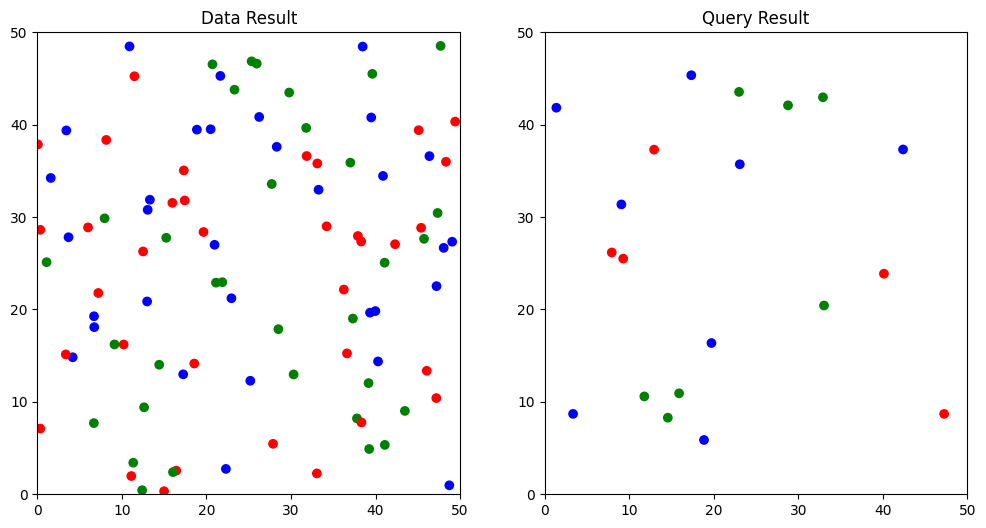

In [44]:
# plot the test data results
import matplotlib.pyplot as plt
# plot in two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# use the same color for both plots, i.e. the labels with 0 to be blue, 1 to be yellow, 2 to be green
colors = np.array(['blue', 'red', 'green'])

# plot the data
axs[0].scatter(datamat[:,0], datamat[:,1], c=colors[datamat[:, 2].astype(int)-1])
# set x and y axis lengths to be both 50
axs[0].set_xlim([0, 50])
axs[0].set_ylim([0, 50])
axs[0].set_title('Data Result')

# plot the query
axs[1].scatter(querymat[:,0], querymat[:,1], c=colors[[int(x)-1 for x in predicted_query_labels]])
# set x and y axis lengths to be both 50
axs[1].set_xlim([0, 50])
axs[1].set_ylim([0, 50])
axs[1].set_title('Query Result')